/tmp/ipykernel_1276/351836898.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')  # You can choose other colormaps, like 'viridis', 'inferno', etc.


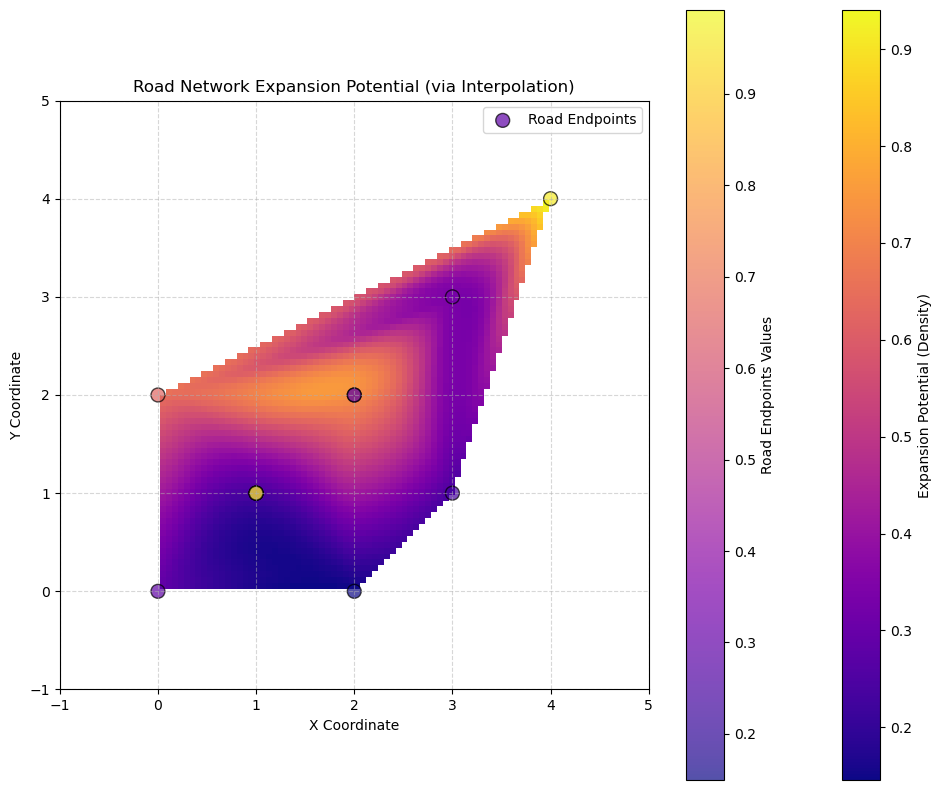

In [1]:
# %% Advanced Directed Graph Visualization from Tabular Data
# Author: [Kaan Yiğit Ertem, Ceren Kekeç, Kamal Jokar Spatial Reconnaissance]
# Date: April 17, 2025
# Version: 1.0
#
# IMPORTANT NOTE: This enhanced visualization was developed prior to the final
# The code implements an advanced graph visualization technique with customizable.
# parameters and aesthetically optimized output.
#
# This script demonstrates how to:
#  - Animate the temporal development of a network
#  - Display cumulative statistics (e.g., total road length, number of segments)
#  - Save the animated output for presentation or reporting purposes

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.cm as cm

# Example endpoints 
endpoints_x = [0, 1, 1, 2, 1, 0, 1, 2, 2, 3, 3, 4]
endpoints_y = [0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 3, 4]

# Assign random values to the points for a variety of colors (e.g., for visualizing some property like road type or expansion potential)
values = np.random.rand(len(endpoints_x))  # Random values for color mapping

# Interpolation Grids
grid_x, grid_y = np.mgrid[
    min(endpoints_x)-1:max(endpoints_x)+1:100j, 
    min(endpoints_y)-1:max(endpoints_y)+1:100j
]

# Interpolate over the grid (methods: 'nearest', 'linear', 'cubic') with example data
grid_z = griddata(
    points=(endpoints_x, endpoints_y), 
    values=values, 
    xi=(grid_x, grid_y), 
    method='cubic'
)


cmap = cm.get_cmap('plasma')  
plt.figure(figsize=(10, 8))

# Interpolated visualization
plt.imshow(grid_z.T, origin='lower', extent=(
    min(endpoints_x)-1, max(endpoints_x)+1,
    min(endpoints_y)-1, max(endpoints_y)+1
), cmap=cmap)

# Colorbars for the grid
plt.colorbar(label="Expansion Potential (Density)")
sc = plt.scatter(endpoints_x, endpoints_y, c=values, cmap=cmap, s=100, edgecolor='black', alpha=0.7, label='Road Endpoints')
plt.colorbar(sc, label="Road Endpoints Values")
plt.title("Road Network Expansion Potential (via Interpolation)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
